In [ ]:
# Importing the dataset

In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('SMSSpamCollection',sep='\t',
                names=['label','message'])

In [ ]:
# Data cleaning and preprocessing

In [4]:
import re
import nltk

In [ ]:
# removing stopwords and implementing stemming to get only useful data

In [5]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [10]:
corpus=[]
for i in range(0,len(data)):
    review=re.sub('[^a-zA-Z]',' ',data['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
# Now converting all the sentences into vectors through Countvectorizer and seperating the independent and dependent variable

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()

In [14]:
y=pd.get_dummies(data['label'])
y=y.iloc[:,1].values

In [ ]:
# spliting the data into tain and test

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
# using Naive Bayes algorithm to train the data

In [16]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
spam_detection=nb.fit(X_train,y_train)

In [17]:
y_pred=spam_detection.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [19]:
cm

array([[946,   9],
       [  8, 152]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [21]:
accuracy

0.9847533632286996

In [ ]:
 # data visualization through heatmap

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

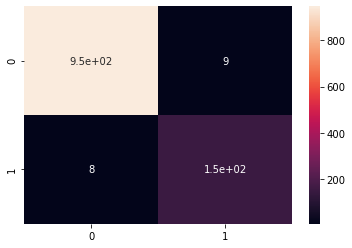

In [23]:
sns.heatmap(cm,annot=True)
plt.show()